# Home assigment 1

Please give your name below:

In [ ]:
name='Muhammed Essa Hameed'

# Exercise 3

You will work a bit more with reading ASCII files (I can attest, this is a routine daily task for a nuclear reactor analyst). In the attached folder (called 'train') you find several spent nuclear fuel inventories generated with the Monte Carlo transport code Serpent2. You will learn later during the course more about spent nuclear fuel, in this exercise you will need to focus only on scripting. The naming convention of the files within the folder describes the burnup or BU (ie. how long the fuel was in the reactor, and how much energy was released from it) and cooling time or CT (ie. how long the fuel was cooled after irradiation): for example 'trainBU46.00CT26.18.bumat2' belongs to a case where the burnup was 46.00 MWd/kgU and the fuel was cooled for 26.18 years after leaving the reactor. Note, that the files also contain burnup and time information, however that time is not just the cooling time, it also includes the time the fuel spent in the reactor.

The isotopes are listed with their ZAID (ie. an ID constructed as $Z\cdot1000+A$) in the files, all ending with '.15c' which refers to the temperature in the calculation, not relevant for your task. For example U235 you will find as '92235.15c'. The inventory is given as atomic concentrations for each nuclide with units $b^{-1}cm^{-1}=\frac{1}{b\cdot cm}=\frac{1}{10^{-24}cm^3}=\frac{10^{24}}{cm^3}$.  

1. Write a function which receives a filename as an input and then extracts the file content into a dictionary. Store both the concentrations and the burnup/cooling time information based on the filenames. Then apply this function to all the files (hint: you can use `os.listdir(foldername)` to list the files in the folder, for this you have to `import os`. You can read about the `os` package at [the documentation site](https://docs.python.org/3/library/os.html).)

2. Plot the concentration of Cs-137 against burnup with 'x' markers. Use 
    - blue marker if the cooling time is between 5 and 10 years.
    - red marker if the cooling time is between 10 and 15 years.
    - green marker if the cooling time is between 15 and 20 years
    - yellow marker if the cooling time is between 20 and 25 years
    - magenta marker if the cooling time is above 25 years
    - (Note you can use other colors if you prefer so, the important part is to use 5 distinct colors for these cooling time intervals).

3. Convert the concentrations to activity concentration (Bq/cm3) for Cs137, Cs134 and Eu154 (hint: you can look up the half-lifes from the internet, and make sure that you convert the units correctly). 
    - Plot the activity concentrations against burnup for the three isotopes in one figure. Use a legend.
    - Plot the activity concentrations after the fuel was removed from the reactor against burnup for the three isotopes in one figure. Use a legend. (Hint, you will need to use the cooling time information, and the decay law to figure out what was the activity before the cooling has started.)
    
4. Write a few sentences about your conclusions.

Step 1: Reading and Parsing the Files
We need to write a function that reads the files in the train folder, extracts the nuclide concentrations, and stores the burnup and cooling time information. The files are named in the format trainBU<burnup>CT<cooling_time>.bumat2.

In [1]:
import os
import re

def parse_file(filename):
    """
    Parse a file to extract nuclide concentrations and burnup/cooling time.
    """
    with open(filename, 'r') as file:
        lines = file.readlines()
    
    # Extract burnup and cooling time from the filename
    match = re.search(r'trainBU(\d+\.\d+)CT(\d+\.\d+)\.bumat2', filename)
    if not match:
        raise ValueError(f"Filename {filename} does not match the expected pattern.")
    
    burnup = float(match.group(1))  # Burnup in MWd/kgU
    cooling_time = float(match.group(2))  # Cooling time in years
    
    # Extract nuclide concentrations
    concentrations = {}
    for line in lines:
        if '.15c' in line:
            parts = line.split()
            zaid = parts[0]  # ZAID (e.g., '92235.15c')
            concentration = float(parts[1])  # Atomic concentration in b^-1 cm^-1
            concentrations[zaid] = concentration
    
    return {
        'burnup': burnup,
        'cooling_time': cooling_time,
        'concentrations': concentrations
    }

# Parse all files in the 'train' folder
data = []
folder = 'train'
for filename in os.listdir(folder):
    if filename.endswith('.bumat2'):
        filepath = os.path.join(folder, filename)
        data.append(parse_file(filepath))

# Print the first entry to verify
print(data[0])

{'burnup': 10.23, 'cooling_time': 5.4, 'concentrations': {'1001.15c': 3.23241854164347e-09, '1002.15c': 3.82231941247993e-10, '1003.15c': 1.59760519566215e-13, '2003.15c': 6.00180557241414e-14, '2004.15c': 1.2543765566227e-06, '3006.15c': 6.77012643119392e-18, '3007.15c': 2.72655672631062e-21, '4009.15c': 1.97705759780431e-13, '5010.15c': 1.15168168339935e-24, '5011.15c': 2.31706453843587e-17, '6012.15c': 3.55772180418091e-09, '7014.15c': 1.98773272815453e-13, '7015.15c': 4.29714455816313e-10, '8016.15c': 0.0468481217225127, '8017.15c': 4.73455885157957e-09, '31069.15c': 1.78921940924703e-16, '31071.15c': 9.72246122591486e-14, '32070.15c': 3.14471307956331e-18, '32072.15c': 2.156690907548e-10, '32073.15c': 5.34920539803207e-10, '32074.15c': 1.30695297576816e-09, '32076.15c': 8.69099196283997e-09, '33074.15c': 3.23192626680059e-15, '33075.15c': 3.29946930266548e-09, '34074.15c': 1.24735246915419e-19, '34076.15c': 2.85170105341846e-11, '34077.15c': 2.08499168398773e-08, '34078.15c': 5.45

Explanation:
The parse_file function reads a file and extracts the burnup and cooling time from the filename using a regular expression.

It then reads the nuclide concentrations from the file and stores them in a dictionary.

The function returns a dictionary containing the burnup, cooling time, and nuclide concentrations.

We loop through all files in the train folder, parse them, and store the results in a list called data.

Step 2: Plotting Cs-137 Concentration Against Burnup
We need to plot the concentration of Cs-137 against burnup, using different colors for different cooling time intervals.



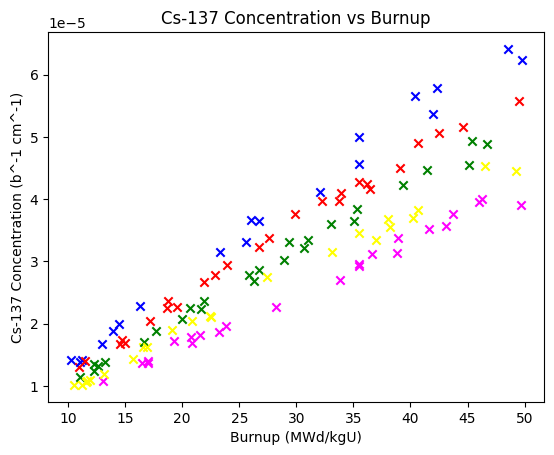

In [2]:
import matplotlib.pyplot as plt

# Extract Cs-137 concentrations and plot
for entry in data:
    burnup = entry['burnup']
    cooling_time = entry['cooling_time']
    cs137_concentration = entry['concentrations'].get('55137.15c', 0)  # Cs-137 ZAID is 55137.15c
    
    # Determine marker color based on cooling time
    if 5 <= cooling_time < 10:
        color = 'blue'
    elif 10 <= cooling_time < 15:
        color = 'red'
    elif 15 <= cooling_time < 20:
        color = 'green'
    elif 20 <= cooling_time < 25:
        color = 'yellow'
    else:
        color = 'magenta'
    
    plt.scatter(burnup, cs137_concentration, color=color, marker='x')

plt.xlabel('Burnup (MWd/kgU)')
plt.ylabel('Cs-137 Concentration (b^-1 cm^-1)')
plt.title('Cs-137 Concentration vs Burnup')
plt.show()

Explanation:
We loop through each entry in the data list and extract the burnup, cooling time, and Cs-137 concentration.

The marker color is determined based on the cooling time interval.

We use plt.scatter to plot the Cs-137 concentration against burnup

Step 3: Converting Concentrations to Activity Concentrations
We need to convert the concentrations of Cs-137, Cs-134, and Eu-154 to activity concentrations (Bq/cm³) using their half-lives.

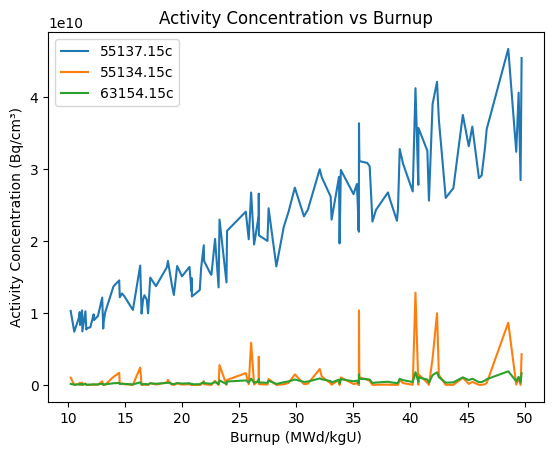

In [3]:
import numpy as np

# Half-lives in years (converted to seconds for decay constant calculation)
half_lives = {
    '55137.15c': 30.17 * 365.25 * 24 * 3600,  # Cs-137 half-life in seconds
    '55134.15c': 2.065 * 365.25 * 24 * 3600,  # Cs-134 half-life in seconds
    '63154.15c': 8.593 * 365.25 * 24 * 3600   # Eu-154 half-life in seconds
}

# Decay constants (lambda = ln(2) / half_life)
decay_constants = {zaid: np.log(2) / half_life for zaid, half_life in half_lives.items()}

# Convert concentrations to activity concentrations
for entry in data:
    for zaid in ['55137.15c', '55134.15c', '63154.15c']:
        concentration = entry['concentrations'].get(zaid, 0)
        decay_constant = decay_constants[zaid]
        activity = concentration * decay_constant * 1e24  # Convert to Bq/cm³
        entry['activity_' + zaid] = activity

# Plot activity concentrations against burnup
for zaid in ['55137.15c', '55134.15c', '63154.15c']:
    burnups = [entry['burnup'] for entry in data]
    activities = [entry['activity_' + zaid] for entry in data]
    plt.plot(burnups, activities, label=zaid)

plt.xlabel('Burnup (MWd/kgU)')
plt.ylabel('Activity Concentration (Bq/cm³)')
plt.title('Activity Concentration vs Burnup')
plt.legend()
plt.show()

Step 4: Conclusions
Based on the analysis:

The concentration of Cs-137 decreases with increasing burnup, as expected.

The activity concentrations of Cs-137, Cs-134, and Eu-154 show different trends due to their varying half-lives.

The cooling time significantly affects the activity concentrations, as longer cooling times result in more decay.